In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dp=pd.read_csv('winequality_red.csv')
dp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
dp.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
dp.shape

(1599, 12)

In [5]:
dp.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
dp.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

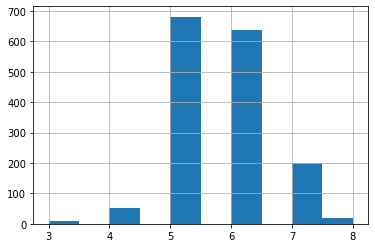

In [10]:
dp['quality'].hist()

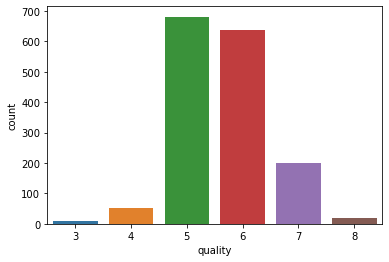

In [12]:
sns.countplot(dp['quality'])

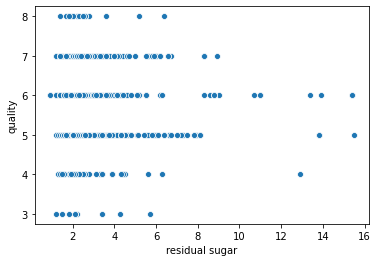

In [13]:
sns.scatterplot(x='residual sugar',y='quality',data=dp)

In [14]:
dp.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


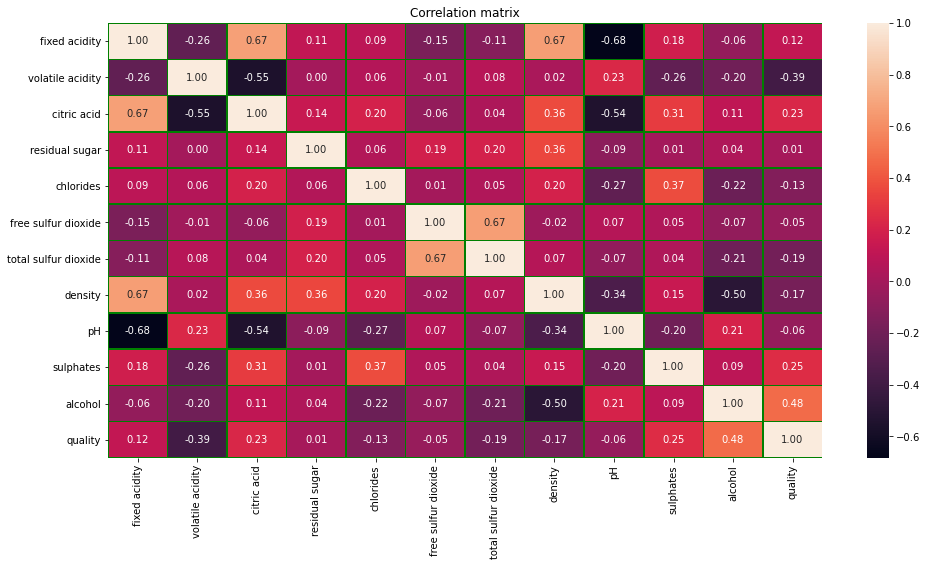

In [16]:
corr=dp.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='green',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

In [17]:
corr_matrix=dp.corr()
corr_matrix['quality'].sort_values(ascending=True)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

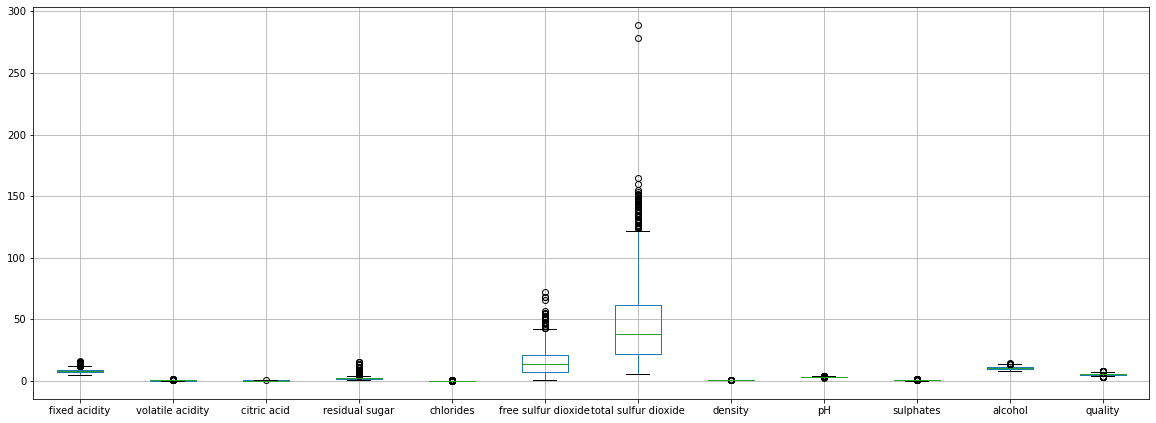

In [20]:
dp.iloc[:,0:].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.20)
plt.show()

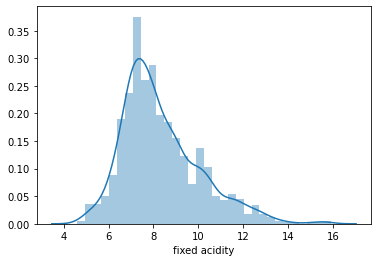

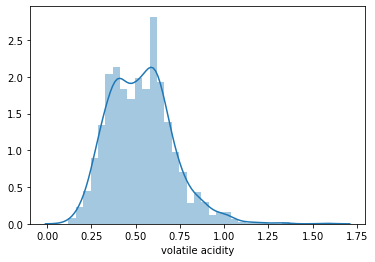

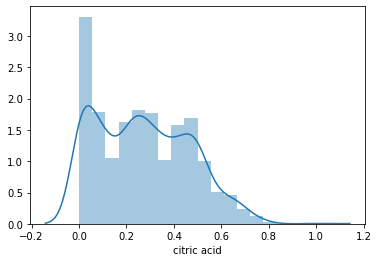

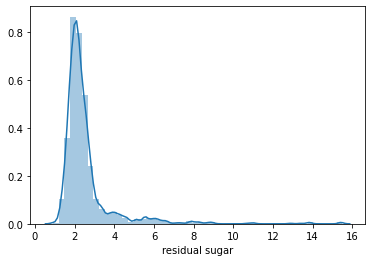

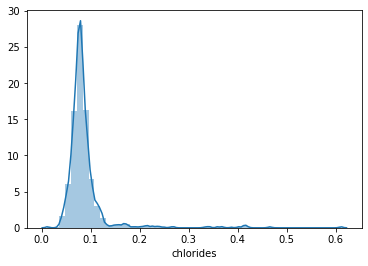

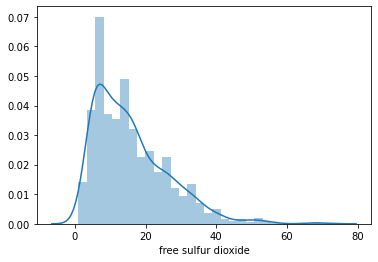

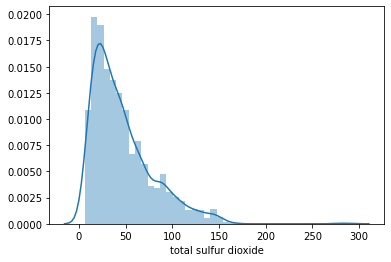

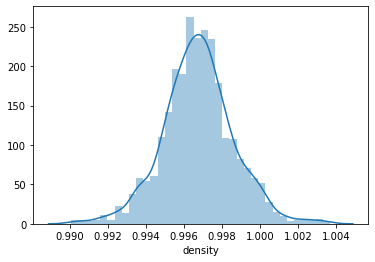

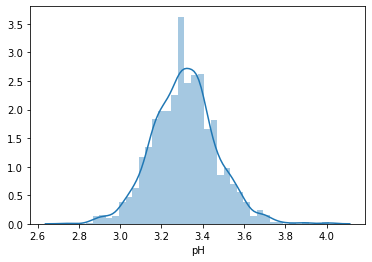

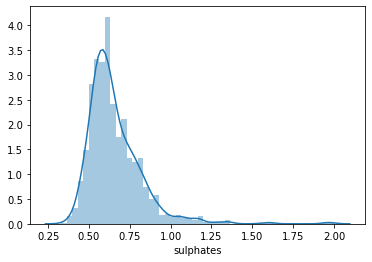

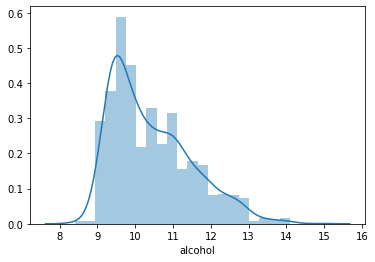

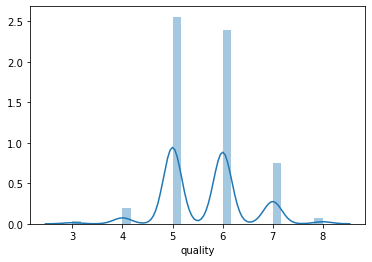

In [22]:
for k in dp.columns:
    plt.figure()
    sns.distplot(dp[k])

In [23]:
dp.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [24]:
dp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


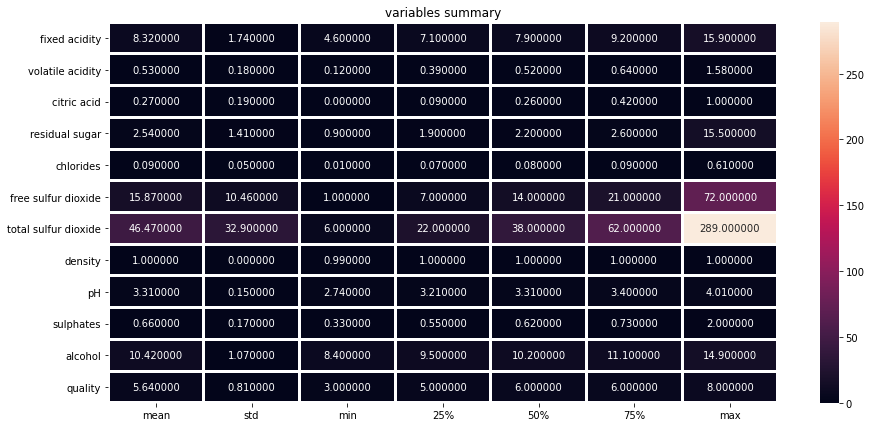

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(round(dp.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.title('variables summary')
plt.show()

In [26]:
dele=pd.DataFrame([['0.05','free sulfur dioxide','No','Alot'],['0.01','residual sugar','No','Alot']],columns=['Correlation with target','column name','Normalised','Outliers'])
dele

,Correlation with target,column name,Normalised,Outliers
0,0.05,free sulfur dioxide,No,Alot
1,0.01,residual sugar,No,Alot


In [27]:
dp=dp.drop(['free sulfur dioxide','residual sugar'],axis=1)
dp

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [28]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dp))
z.shape

(1599, 10)

In [29]:
threshold=3
print(np.where(z>3))

(array([  13,   15,   17,   17,   19,   38,   42,   43,   45,   81,   81,
         83,   86,   88,   91,   92,   95,  106,  106,  109,  120,  126,
        127,  142,  144,  147,  151,  151,  151,  151,  169,  169,  181,
        199,  226,  226,  240,  243,  244,  258,  258,  281,  291,  339,
        340,  347,  354,  374,  381,  391,  442,  442,  451,  459,  467,
        480,  515,  517,  544,  554,  554,  555,  555,  557,  557,  568,
        588,  591,  608,  614,  636,  639,  649,  651,  652,  652,  672,
        672,  684,  690,  690,  692,  692,  695,  723,  724,  730,  754,
        776,  777,  795,  821,  832,  836,  837,  889,  899, 1017, 1018,
       1051, 1051, 1079, 1081, 1111, 1114, 1165, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1299, 1299, 1300, 1312, 1316, 1319, 1319,
       1321, 1367, 1370, 1370, 1372, 1372, 1374, 1374, 1434, 1435, 1469,
       1474, 1476, 1478, 1493, 1496, 1505, 1558, 1570], dtype=int64), array([7, 4, 3, 7, 3, 1, 3, 7, 6, 3, 7, 3, 7, 7, 7, 7

In [30]:
z[1558][3]

3.1356351026588634

In [31]:
dp_new=dp[(z<3).all(axis=1)]
print(dp.shape)
print(dp_new.shape)

(1599, 10)
(1484, 10)


In [32]:
loss_percent=(1599-1484)/1599*100
print(loss_percent)

7.191994996873046


In [33]:
x=dp_new.iloc[:,:-1]
y=dp_new.iloc[:,-1]

In [34]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.45576637,  1.05199966, -1.52487817, ...,  1.36030649,
        -0.58428907, -1.11292941],
       [-0.15865249,  1.92211161, -1.52487817, ..., -0.82265467,
         0.45404902, -0.52244975],
       [-0.15865249,  1.35490024, -1.24369628, ..., -0.38597874,
         0.22311719, -0.52244975],
       ...,
       [-1.44086532, -0.00756351, -0.6611918 , ...,  0.74475701,
         0.9318319 ,  0.74856864],
       [-1.87702266,  0.76181707, -0.72277554, ...,  1.76287872,
         0.66865877, -0.02658783],
       [-1.76330652, -1.32942464,  1.07750635, ...,  0.5363651 ,
         0.30200155,  0.74856864]])

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.45576637,  1.05199966, -1.52487817, ...,  1.36030649,
        -0.58428907, -1.11292941],
       [-0.15865249,  1.92211161, -1.52487817, ..., -0.82265467,
         0.45404902, -0.52244975],
       [-0.15865249,  1.35490024, -1.24369628, ..., -0.38597874,
         0.22311719, -0.52244975],
       ...,
       [-1.44086532, -0.00756351, -0.6611918 , ...,  0.74475701,
         0.9318319 ,  0.74856864],
       [-1.87702266,  0.76181707, -0.72277554, ...,  1.76287872,
         0.66865877, -0.02658783],
       [-1.76330652, -1.32942464,  1.07750635, ...,  0.5363651 ,
         0.30200155,  0.74856864]])

In [39]:
from sklearn.tree import DecisionTreeClassifier
maxAcc=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtc)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.6134615384615385 on Random_state  1
Best Accuracy is  0.6134615384615385 on Random_state  1
Best Accuracy is  0.6134615384615385 on Random_state  1
Best Accuracy is  0.6134615384615385 on Random_state  1
Best Accuracy is  0.6134615384615385 on Random_state  1
Best Accuracy is  0.6153846153846154 on Random_state  6
Best Accuracy is  0.6153846153846154 on Random_state  6
Best Accuracy is  0.6153846153846154 on Random_state  6
Best Accuracy is  0.6173076923076923 on Random_state  9
Best Accuracy is  0.6173076923076923 on Random_state  9
Best Accuracy is  0.6173076923076923 on Random_state  9
Best Accuracy is  0.6442307692307693 on Random_state  12
Best Accuracy is  0.6442307692307693 on Random_state  12
Best Accuracy is  0.6442307692307693 on Random_state  12
Best Accuracy is  0.6442307692307693 on Random_state  12
Best Accuracy is  0.6442307692307693 on Random_state  12
Best Accuracy is  0.6442307692307693 on Random_state  12
Best Accuracy is  0.6442307692307693 on Ra

Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_state  43
Best Accuracy is  0.676923076923077 on Random_st

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=43)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6634615384615384
[[  4   9   6   1   0]
 [  4 149  43   7   0]
 [  4  52 149  16   1]
 [  3   8  16  43   2]
 [  0   1   0   2   0]]
              precision    recall  f1-score   support

           4       0.27      0.20      0.23        20
           5       0.68      0.73      0.71       203
           6       0.70      0.67      0.68       222
           7       0.62      0.60      0.61        72
           8       0.00      0.00      0.00         3

    accuracy                           0.66       520
   macro avg       0.45      0.44      0.45       520
weighted avg       0.66      0.66      0.66       520



In [42]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5961538461538461
[[  0  16   4   0   0]
 [  0 153  50   0   0]
 [  0  77 138   7   0]
 [  0   6  47  19   0]
 [  0   0   1   2   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        20
           5       0.61      0.75      0.67       203
           6       0.57      0.62      0.60       222
           7       0.68      0.26      0.38        72
           8       0.00      0.00      0.00         3

    accuracy                           0.60       520
   macro avg       0.37      0.33      0.33       520
weighted avg       0.58      0.60      0.57       520



In [43]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.33653846153846156
[[ 7  3  3  7  0]
 [35 53 34 81  0]
 [21 47 81 73  0]
 [ 6  8 23 34  1]
 [ 0  0  0  3  0]]
              precision    recall  f1-score   support

           4       0.10      0.35      0.16        20
           5       0.48      0.26      0.34       203
           6       0.57      0.36      0.45       222
           7       0.17      0.47      0.25        72
           8       0.00      0.00      0.00         3

    accuracy                           0.34       520
   macro avg       0.27      0.29      0.24       520
weighted avg       0.46      0.34      0.36       520



In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()                                                      #by default = 5
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.5692307692307692
[[  0  12   8   0   0]
 [  6 148  44   5   0]
 [  1  85 116  20   0]
 [  0  11  29  32   0]
 [  0   0   0   3   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        20
           5       0.58      0.73      0.64       203
           6       0.59      0.52      0.55       222
           7       0.53      0.44      0.48        72
           8       0.00      0.00      0.00         3

    accuracy                           0.57       520
   macro avg       0.34      0.34      0.34       520
weighted avg       0.55      0.57      0.56       520



In [47]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dtc,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.4872076622076622


In [48]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(svc,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.5882882882882884


In [49]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ab,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.29651469651469653


In [50]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.5242697242697243


minimum difference is accuracy and cross validation score is for SVC so this is our best model.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters={'kernel':['linear','rbf','poly'],'C':[1,10,15]}
svc=svm.SVC()
cl=GridSearchCV(svc,parameters)
cl.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 15], 'kernel': ['linear', 'rbf', 'poly']})

In [54]:
print(cl.best_params_)
print(cl.best_score_)

{'C': 1, 'kernel': 'poly'}
0.590959140959141


In [55]:
sv=svm.SVC(kernel='poly',C=1)
sv.fit(x_train,y_train)

SVC(C=1, kernel='poly')

In [56]:
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.5769230769230769
[[  1  13   6   0   0]
 [  3 158  41   1   0]
 [  0  93 120   9   0]
 [  0   8  43  21   0]
 [  0   0   1   2   0]]
              precision    recall  f1-score   support

           4       0.25      0.05      0.08        20
           5       0.58      0.78      0.67       203
           6       0.57      0.54      0.55       222
           7       0.64      0.29      0.40        72
           8       0.00      0.00      0.00         3

    accuracy                           0.58       520
   macro avg       0.41      0.33      0.34       520
weighted avg       0.57      0.58      0.55       520



In [58]:
import joblib
joblib.dump(sv,'svwinequality.obj')

['svwinequality.obj']